In [1]:
import pyspark
from pyspark.sql import SparkSession

In [116]:
spark = SparkSession.builder.getOrCreate()

## Spark SQL
Spark SQL is a Spark module for structured data processing. Unlike the basic Spark RDD API, the interfaces provided by Spark SQL provide Spark with more information about the structure of both the data and the computation being performed. Internally, Spark SQL uses this extra information to perform extra optimizations. There are several ways to interact with Spark SQL including SQL and the Dataset API. When computing a result, the same execution engine is used, independent of which API/language you are using to express the computation. This unification means that developers can easily switch back and forth between different APIs based on which provides the most natural way to express a given transformation.

<ul>
<li>One use of Spark SQL is to execute SQL queries. Spark SQL can also be used to read data from an existing Hive installation.</li>
<li>When running SQL from within another programming language the results will be returned as a Dataset/DataFrame.</li>
</ul>

## Spark SQL and the Underlying Engine
<ul>
    <li>At a programmatic level, Spark SQL allows developers to issue ANSI SQL:2003–compatible queries on structured data with a schema.</li>
    <li>Since its introduction in Spark 1.3, Spark SQL has evolved into a substantial engine upon which many high-level structured functionalities have been built.</li>
    <li>Apart from allowing you to issue SQL-like queries on your data, the Spark SQL engine:</li>
    <ol>
        <li>Unifies Spark components and permits abstraction to DataFrames/Datasets in Java, Scala, Python, and R, which simplifies working with structured data sets.</li>
        <li>Connects to the Apache Hive metastore and tables.</li>
        <li>Reads and writes structured data with a specific schema from structured file formats (JSON, CSV, Text, Avro, Parquet, ORC, etc.) and converts data into temporary tables.</li>
        <li>Offers an interactive Spark SQL shell for quick data exploration.</li>
        <li>Provides a bridge to (and from) external tools via standard database JDBC/ODBC connectors.</li>
        <li>Provides a programmatic interface to interact with structured data stored as tables or views in a database from a Spark application</li>
    </ol>
</ul>
At the core of the Spark SQL engine are the Catalyst optimizer and Project Tungsten. Together, these support the high-level DataFrame and Dataset APIs and SQL queries.

<h1><center>Spark SQL and its stack<center></h1>

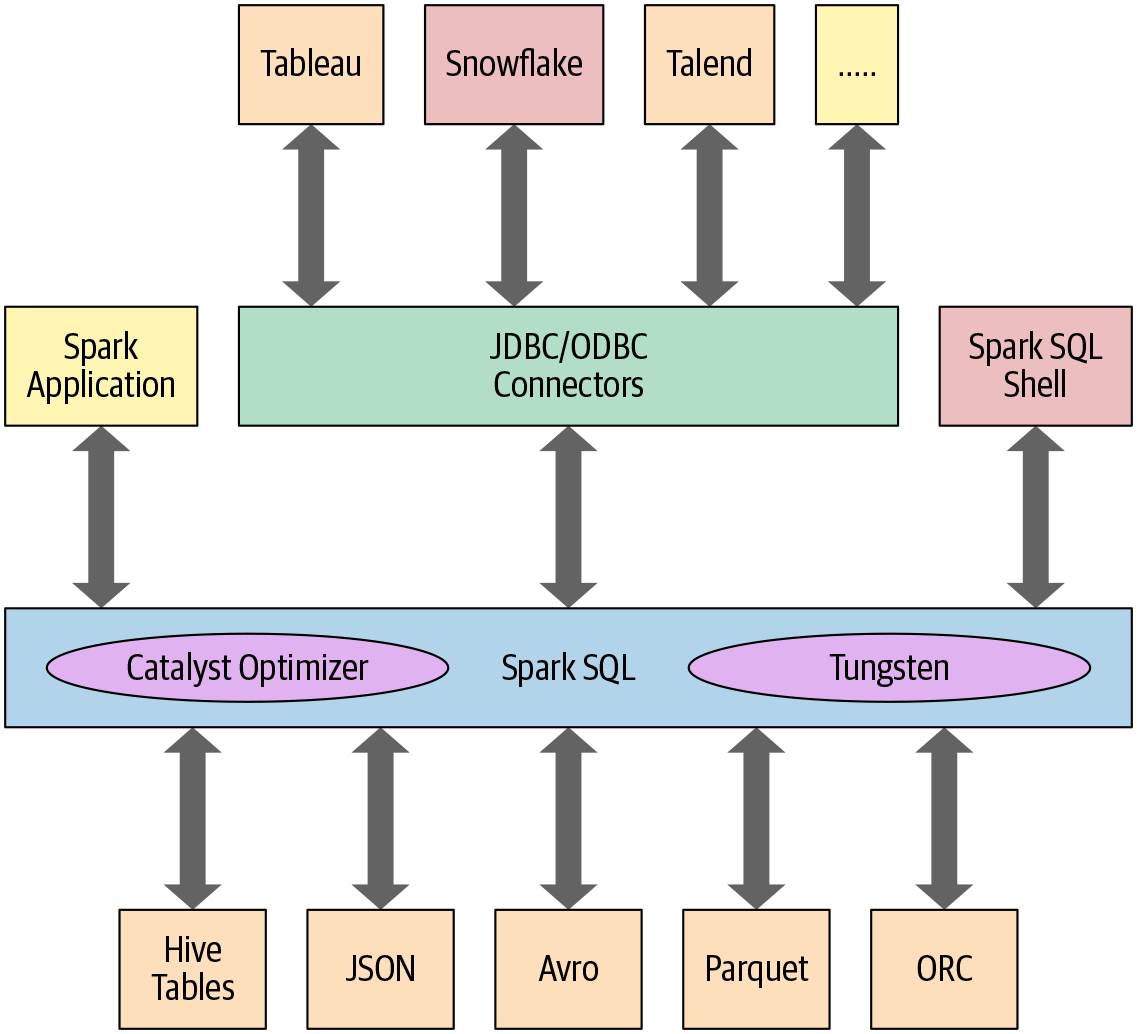

<h1><font color = 'red'>Optional Section</font></h1>

## The Catalyst Optimizer
The Catalyst optimizer takes a computational query and converts it into an execution plan. It goes through four transformational phases:
<ol>
    <li>Analysis.</li>
    <li>Logical optimization.</li>
    <li>Physical planning.</li>
    <li>Code generation.</li>
</ol>

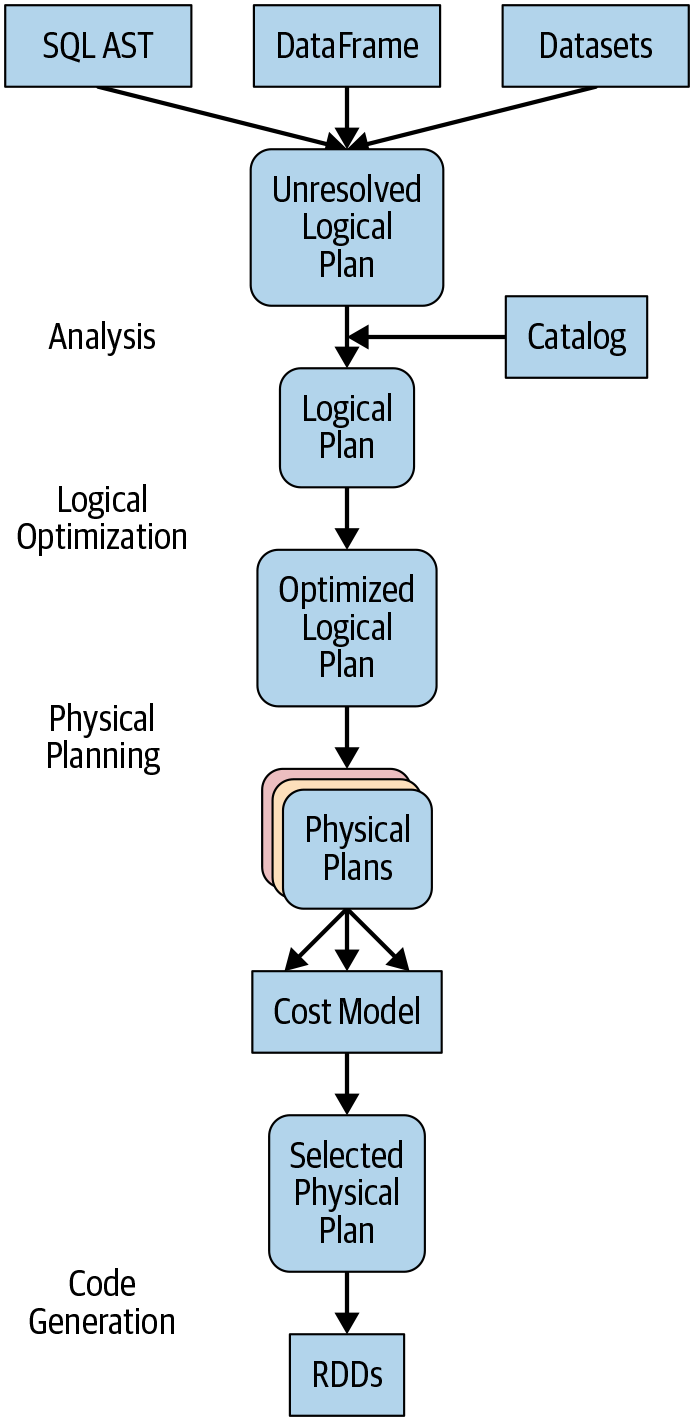

<h1><font color = 'red'>End of Optional Section</font></h1>

## Using Spark SQL in Spark Applications
To issue any SQL query, use the <b>sql()</b> method on the <b>SparkSession instance, spark</b>, such as <b>spark.sql("SELECT * FROM myTableName")</b>. All spark.sql queries executed in this manner return a DataFrame on which you may perform further Spark operations if you desire.

In [3]:
# Airline On-Time Performance and Causes of Flight Delays data set, which contains data on US flights 
# including date, delay, distance, origin, and destination.

### The US flight delays data set has five columns:
<ul><b>
    <li>The date column contains a string like 02190925 . When converted, this maps to 02-19 09:25 am.</li>
    <li>The delay column gives the delay in minutes between the scheduled and actual departure times. Early departures show negative numbers.</li>
    <li>The distance column gives the distance in miles from the origin airport to the destination airport.</li>
    <li>The origin column contains the origin IATA airport code.</li>
    <li>The destination column contains the destination IATA airport code.</li>
</b></ul>

In [4]:
df_schema = "date STRING, delay INT, distance INT, origin STRING, destination STRING"

In [5]:
df = spark.read.csv('departuredelays.csv',
                   schema=df_schema,
                   header=True,
                   )

In [6]:
df.printSchema()

root
 |-- date: string (nullable = true)
 |-- delay: integer (nullable = true)
 |-- distance: integer (nullable = true)
 |-- origin: string (nullable = true)
 |-- destination: string (nullable = true)



In [7]:
df.show(2)

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01011245|    6|     602|   ABE|        ATL|
|01020600|   -8|     369|   ABE|        DTW|
+--------+-----+--------+------+-----------+
only showing top 2 rows



In [8]:
# register the DataFrame as a temporary view
df.createOrReplaceTempView("us_delay_flights_tbl")

Now that we have a temporary view, we can issue SQL queries using Spark SQL.
These queries are no different from those you might issue against a SQL table in, say,
a MySQL or PostgreSQL database. The point here is to show that Spark SQL offers an
ANSI:2003–compliant SQL interface, and to demonstrate the interoperability
between SQL and DataFrames.

### Find all flights whose distance is greater than 1,000 miles:

In [9]:
spark.sql("""SELECT distance, origin, destination
            from us_delay_flights_tbl
            WHERE distance > 1000
          """)

DataFrame[distance: int, origin: string, destination: string]

In [10]:
df_flights_dist = spark.sql("""SELECT distance, origin, destination
            from us_delay_flights_tbl
            WHERE distance > 1000
          """)

In [11]:
df_flights_dist.show()

+--------+------+-----------+
|distance|origin|destination|
+--------+------+-----------+
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
|    1586|   ABQ|        JFK|
+--------+------+-----------+
only showing top 20 rows



In [12]:
spark.sql("""SELECT * 
          FROM us_delay_flights_tbl 
          WHERE distance > 1000 
          ORDER BY distance DESC""").show(10)

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|03011625|   -1|    4330|   HNL|        JFK|
|03151530|    2|    4330|   HNL|        JFK|
|03021625|   14|    4330|   HNL|        JFK|
|03051625|   -6|    4330|   HNL|        JFK|
|03061625|   -2|    4330|   HNL|        JFK|
|03071625|   -1|    4330|   HNL|        JFK|
|03081530|    4|    4330|   HNL|        JFK|
|03091530|   -7|    4330|   HNL|        JFK|
|03121530|   -3|    4330|   HNL|        JFK|
|03131530|    0|    4330|   HNL|        JFK|
+--------+-----+--------+------+-----------+
only showing top 10 rows



<i><b>As the results show, all of the longest flights were between Honolulu (HNL) and New York (JFK).</b></i>

### Find all flights between San Francisco (SFO) and Chicago (ORD) with at least a two-hour delay:

In [13]:
spark.sql("""SELECT * FROM us_delay_flights_tbl
            WHERE origin='SFO' AND destination='ORD' AND delay>120  
            ORDER BY delay DESC""").show()

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|02190925| 1638|    1604|   SFO|        ORD|
|01031755|  396|    1604|   SFO|        ORD|
|01022330|  326|    1604|   SFO|        ORD|
|01051205|  320|    1604|   SFO|        ORD|
|01190925|  297|    1604|   SFO|        ORD|
|02171115|  296|    1604|   SFO|        ORD|
|01071040|  279|    1604|   SFO|        ORD|
|01051550|  274|    1604|   SFO|        ORD|
|03120730|  266|    1604|   SFO|        ORD|
|01261104|  258|    1604|   SFO|        ORD|
|01161210|  225|    1604|   SFO|        ORD|
|02091800|  223|    1604|   SFO|        ORD|
|01221040|  215|    1604|   SFO|        ORD|
|03121155|  203|    1604|   SFO|        ORD|
|02111256|  197|    1604|   SFO|        ORD|
|03311405|  196|    1604|   SFO|        ORD|
|01031920|  193|    1604|   SFO|        ORD|
|01021410|  190|    1604|   SFO|        ORD|
|03171215|  189|    1604|   SFO|        ORD|
|03260828|

In [14]:
spark.sql("""SELECT date, delay, origin, destination 
          FROM us_delay_flights_tbl 
          WHERE delay > 120 AND ORIGIN = 'SFO' AND DESTINATION = 'ORD' 
          ORDER by delay DESC""").show(10)

+--------+-----+------+-----------+
|    date|delay|origin|destination|
+--------+-----+------+-----------+
|02190925| 1638|   SFO|        ORD|
|01031755|  396|   SFO|        ORD|
|01022330|  326|   SFO|        ORD|
|01051205|  320|   SFO|        ORD|
|01190925|  297|   SFO|        ORD|
|02171115|  296|   SFO|        ORD|
|01071040|  279|   SFO|        ORD|
|01051550|  274|   SFO|        ORD|
|03120730|  266|   SFO|        ORD|
|01261104|  258|   SFO|        ORD|
+--------+-----+------+-----------+
only showing top 10 rows



<i><b>It seems there were many significantly delayed flights between these two cities, on different dates.</b></i>

### Exercise:
<i><b>
convert the date column into a readable format and find
the days or months when these delays were most common. Were the delays related to
winter months or holidays?</b></i> 

In [15]:
from pyspark.sql.functions import *

#### Let’s try a more complicated query where we use the CASE clause in SQL.

we want to label all US flights, regardless of origin and destination,
with an indication of the delays they experienced: Very Long Delays (> 6 hours),
Long Delays (2–6 hours), etc. We’ll add these human-readable labels in a new column
called Flight_Delays :

In [16]:
spark.sql("""SELECT delay, origin, destination,
            CASE
            WHEN delay > 360 THEN 'Very Long Delays'
            WHEN delay > 120 AND delay < 360 THEN 'Long Delays'
            WHEN delay > 60 AND delay < 120 THEN 'Short Delays'
            WHEN delay > 0 and delay < 60 THEN 'Tolerable Delays'
            WHEN delay = 0 THEN 'No Delays'
            ELSE 'Early'
            END AS Flight_Delays
            FROM us_delay_flights_tbl
            ORDER BY origin, delay DESC""").show(10)

+-----+------+-----------+-------------+
|delay|origin|destination|Flight_Delays|
+-----+------+-----------+-------------+
|  333|   ABE|        ATL|  Long Delays|
|  305|   ABE|        ATL|  Long Delays|
|  275|   ABE|        ATL|  Long Delays|
|  257|   ABE|        ATL|  Long Delays|
|  247|   ABE|        ATL|  Long Delays|
|  247|   ABE|        DTW|  Long Delays|
|  219|   ABE|        ORD|  Long Delays|
|  211|   ABE|        ATL|  Long Delays|
|  197|   ABE|        DTW|  Long Delays|
|  192|   ABE|        ORD|  Long Delays|
+-----+------+-----------+-------------+
only showing top 10 rows



<b><font color=red>Note: </font></b> <b>any SQL query can be expressed with an equivalent DataFrame API</b>

In [17]:
spark.sql("""SELECT distance, origin, destination 
          FROM us_delay_flights_tbl 
          WHERE distance > 1000 
          ORDER BY distance DESC""").show(10)

+--------+------+-----------+
|distance|origin|destination|
+--------+------+-----------+
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
+--------+------+-----------+
only showing top 10 rows



In [18]:
from pyspark.sql.functions import col,desc

In [19]:
(df.select("distance", "origin", "destination")
 .where(col("distance") > 1000)
 .orderBy(desc("distance"))).show(10)

+--------+------+-----------+
|distance|origin|destination|
+--------+------+-----------+
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
+--------+------+-----------+
only showing top 10 rows



In [20]:
(df.select("distance", "origin", "destination")
 .where(col("distance") > 1000)
 .orderBy("distance",ascending=False)).show(10)

+--------+------+-----------+
|distance|origin|destination|
+--------+------+-----------+
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
|    4330|   HNL|        JFK|
+--------+------+-----------+
only showing top 10 rows



### Exercise:
<i><b>
Try converting the other two SQL queries to use the DataFrame API.</b></i> 

<ul>
    <li>As shown, using the Spark SQL interface to query data is similar to writing a regular SQL query to a relational database table.</li>
    <li>Although the queries are in SQL, you can feel the similarity in readability and semantics to DataFrame API operations.</li>
    <li>To enable you to query structured data, Spark manages all the complexities of creating and managing views and tables, both in memory and on disk.</li>
</ul>

## Data Sources for DataFrames and SQL Tables
Spark SQL provides an interface to a variety of data sources.
It also provides a set of common methods for reading and writing data to and from
these data sources using the Data Sources API.

Spark provides two high-level Data Source APIs. <b>DataFrameReader</b>, that enables you to read data into a DataFrame from myriad data sources in formats such as JSON, CSV, Parquet, Text, Avro, ORC, etc. Likewise, to write a DataFrame back to a data source in a particular format, Spark uses <b>DataFrameWriter</b>.

### DataFrameReader
It has a defined format and a recommended pattern for usage:

<b>DataFrameReader.format(args).option("key", "value").schema(args).load()</b>

<b><font color='red'>Note:</font></b> you can only access a DataFrameReader through a SparkSession instance.
That is, you cannot create an instance of DataFrameReader. 
<br><br>To get an instance handle
to it, use:<br><br>
<b>SparkSession.read</b>  to read from static data source<br>
// or<br>
<b>SparkSession.readStream</b> to read from streaming data source.

<h3><center>DataFrameReader methods, arguments, and options</center></h3>

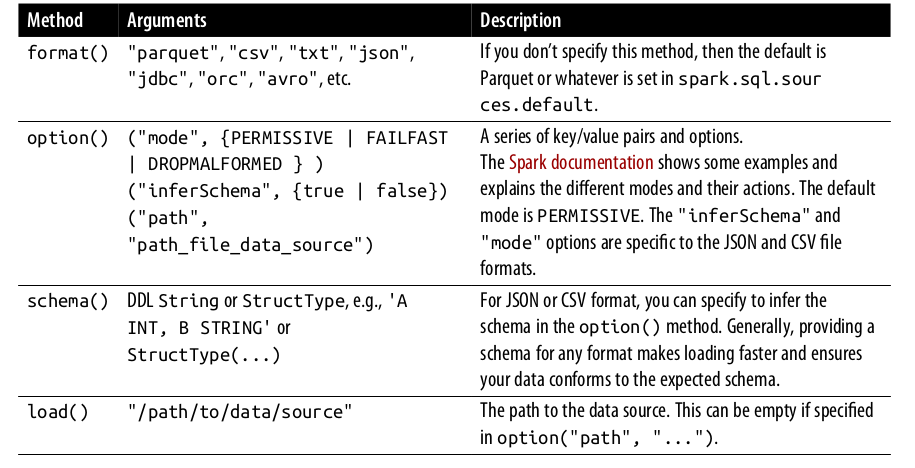

In [25]:
df_parquet = spark.read.format('parquet').load('./parquet/2010-summary.parquet')

In [28]:
df_parquet = spark.read.parquet('./parquet/2010-summary.parquet')

In [29]:
df_parquet.show(2)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
+-----------------+-------------------+-----+
only showing top 2 rows



In [30]:
df_csv = (spark.read.format('csv')
          .option('inferSchema','true')
          .option('header','true')
          .load('./csv/*')
         )

In [31]:
df_csv.show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
|    United States|          Singapore|   25|
|    United States|            Grenada|   54|
|       Costa Rica|      United States|  477|
|          Senegal|      United States|   29|
|    United States|   Marshall Islands|   44|
+-----------------+-------------------+-----+
only showing top 10 rows



In [33]:
df_csv = spark.read.csv('./csv/*',header=True,inferSchema=True)

In [34]:
df_csv.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

In [35]:
df_json = (spark.read.format('json')
          .option('inferSchema','true')
          .option('header','true')
          .load('./json/*')
         )

In [36]:
df_json.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



### DataFrameWriter
Unlike with <b>DataFrameReader</b> , you access its instance not
from a <b>SparkSession</b> but from the <b>DataFrame</b> you wish to save. It has a few recommended usage patterns:<br><br>
<b>
DataFrameWriter.format(args).option(args).bucketBy(args).partitionBy(args).save(path)<br><br>
DataFrameWriter.format(args).option(args).sortBy(args).saveAsTable(table)
</b>
<br><br>To get an instance handle
to it, use:<br><br>
<b>DataFrame.write</b>  to write to static data<br>
// or<br>
<b>DataFrame.writeStream</b> to write streaming data.

<h3><center>DataFrameWriter methods, arguments, and options</center></h3>

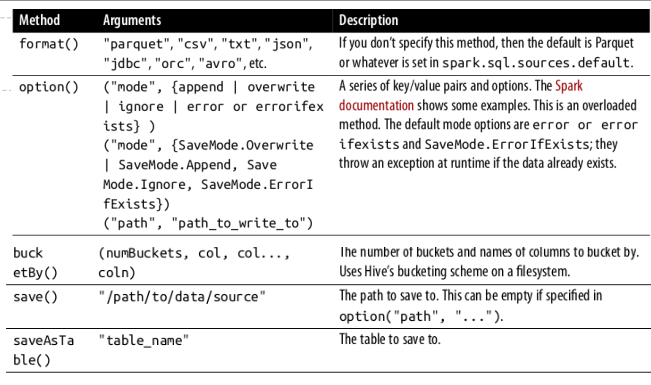

In [37]:
df.show()

+--------+-----+--------+------+-----------+
|    date|delay|distance|origin|destination|
+--------+-----+--------+------+-----------+
|01011245|    6|     602|   ABE|        ATL|
|01020600|   -8|     369|   ABE|        DTW|
|01021245|   -2|     602|   ABE|        ATL|
|01020605|   -4|     602|   ABE|        ATL|
|01031245|   -4|     602|   ABE|        ATL|
|01030605|    0|     602|   ABE|        ATL|
|01041243|   10|     602|   ABE|        ATL|
|01040605|   28|     602|   ABE|        ATL|
|01051245|   88|     602|   ABE|        ATL|
|01050605|    9|     602|   ABE|        ATL|
|01061215|   -6|     602|   ABE|        ATL|
|01061725|   69|     602|   ABE|        ATL|
|01061230|    0|     369|   ABE|        DTW|
|01060625|   -3|     602|   ABE|        ATL|
|01070600|    0|     369|   ABE|        DTW|
|01071725|    0|     602|   ABE|        ATL|
|01071230|    0|     369|   ABE|        DTW|
|01070625|    0|     602|   ABE|        ATL|
|01071219|    0|     569|   ABE|        ORD|
|01080600|

In [40]:
df.write.format('json').mode('overwrite').save('Myjson')

In [39]:
df.write.csv('Mycsv',mode='overwrite')

## Data Sources

### Parquet
<b>It is the default data source in Spark.</b><br>
Supported and widely used by many big data processing frameworks
and platforms, Parquet is an open source columnar file format that offers many I/O
optimizations (such as compression, which saves storage space and allows for quick
access to data columns).<br>
Because of its efficiency and these optimizations, it is recommend that after you have
transformed and cleansed your data, you save your DataFrames in the Parquet format
for downstream consumption.<br>
Parquet files are stored in a directory structure that contains the data files, metadata,
a number of compressed files, and some status files.

In [94]:
#To read Parquet files into a DataFrame, you simply specify the format and path:
df_parquet = spark.read.format("parquet").load('./parquet/2010-summary.parquet/')

In [95]:
df_parquet.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [96]:
df_parquet = spark.read.format("parquet").schema(schema).load('./parquet/2010-summary.parquet/')

In [97]:
df_parquet.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: integer (nullable = true)



In [74]:
df_parquet.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

In [47]:
df_parquet = spark.read.parquet('./parquet/2010-summary.parquet/')

In [72]:
df_parquet.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [48]:
df_parquet.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

### Reading Parquet files into a Spark SQL table
As well as reading Parquet files into a Spark DataFrame, you can also create a Spark
SQL unmanaged table or view directly using SQL:

In [49]:
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW us_delay_flights_tbl 
USING parquet 
OPTIONS(path './parquet/2010-summary.parquet/')""")

DataFrame[]

In [50]:
spark.sql("SELECT * FROM us_delay_flights_tbl").show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|    1|
|       United States|            Ireland|  264|
|       United States|              India|   69|
|               Egypt|      United States|   24|
|   Equatorial Guinea|      United States|    1|
|       United States|          Singapore|   25|
|       United States|            Grenada|   54|
|          Costa Rica|      United States|  477|
|             Senegal|      United States|   29|
|       United States|   Marshall Islands|   44|
|              Guyana|      United States|   17|
|       United States|       Sint Maarten|   53|
|               Malta|      United States|    1|
|             Bolivia|      United States|   46|
|            Anguilla|      United States|   21|
|Turks and Caicos ...|      United States|  136|
|       United States|        Afghanistan|    2|
|Saint Vincent and..

### Writing DataFrames to Parquet files

In [58]:
(df.write.format("parquet")
 .mode("overwrite")
 .option("compression", "snappy")
 .save("df_parquet"))

In [60]:
df.write.parquet('df_parquet',mode='overwrite',compression='snappy')

<b><font color = 'red'>Note: </font></b><br>
    Parquet is the preferred and default built-in data source file format in
Spark, and it has been adopted by many other frameworks. It is recommended that you
use this format in your ETL and data ingestion processes.

### JSON
<b>JavaScript Object Notation (JSON)</b> is also a popular data format. It came to prominence as an easy-to-read and easy-to-parse format compared to XML. It has two representational formats: single-line mode and multiline mode. Both modes are
supported in Spark.<br>
In single-line mode each line denotes a single JSON object, whereas in multiline
mode the entire multiline object constitutes a single JSON object. To read in this
mode, set multiLine to true in the option() method.

In [61]:
# Reading a JSON file into a DataFrame
df_json = spark.read.format("json").load('./json/*')
df_json.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [62]:
#Reading a JSON file into a Spark SQL table
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW us_delay_flights_tbl
USING json
OPTIONS (
path "./json/*")
""")
spark.sql("SELECT * FROM us_delay_flights_tbl").show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [63]:
# Writing DataFrames to JSON files
(df.write.format("json")
.mode("overwrite")
.save("df_json"))

### CSV

In [99]:
# Reading a CSV file into a DataFrame
schema = "DEST_COUNTRY_NAME STRING, ORIGIN_COUNTRY_NAME STRING, count INT"
df_csv = (spark.read.format("csv")
.option("header", "true")
.schema(schema)
.option("mode", "FAILFAST") # Exit if any errors
.option("nullValue", "") # Replace any null data field with quotes
.load("./csv/*"))

In [100]:
df_csv.show(3)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
+-----------------+-------------------+-----+
only showing top 3 rows



In [101]:
# Reading a CSV file into a Spark SQL table
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW us_delay_flights_tbl
USING csv
OPTIONS(path "./csv/*", header "true", inferSchema "true", mode "FAILFAST")
""")

DataFrame[]

In [102]:
spark.sql("SELECT * FROM us_delay_flights_tbl").show(10)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|    1|
|    United States|            Ireland|  264|
|    United States|              India|   69|
|            Egypt|      United States|   24|
|Equatorial Guinea|      United States|    1|
|    United States|          Singapore|   25|
|    United States|            Grenada|   54|
|       Costa Rica|      United States|  477|
|          Senegal|      United States|   29|
|    United States|   Marshall Islands|   44|
+-----------------+-------------------+-----+
only showing top 10 rows



In [103]:
# Writing DataFrames to CSV files
df.write.format('csv').mode('overwrite').save('df_csv')

## Interacting with External Data Sources

### JDBC and SQL Databases
Spark SQL includes a data source API that can read data from other databases using
<b>JDBC (Java Database Connectivity)</b>. It simplifies querying these data sources as it returns the results as a DataFrame, thus providing all of the benefits of Spark SQL (including performance and
the ability to join with other data sources)<br>
Using the data source API, the tables from the remote database can be loaded as a
DataFrame or Spark SQL temporary view.

### PostgreSQL

In [ ]:
# Read Option 1: Loading data from a JDBC source using load method
jdbcDF1 = (spark
           .read
           .format("jdbc")
           .option("url", "jdbc:postgresql://[DBSERVER]")
           .option("dbtable", "[SCHEMA].[TABLENAME]")
           .option("user", "[USERNAME]")
           .option("password", "[PASSWORD]")
           .load())

# Read Option 2: Loading data from a JDBC source using jdbc method
jdbcDF2 = (spark
           .read
           .jdbc("jdbc:postgresql://[DBSERVER]", "[SCHEMA].[TABLENAME]",
                 properties={"user": "[USERNAME]", "password": "[PASSWORD]"}))


# Write Option 1: Saving data to a JDBC source using save method
(jdbcDF1
.write
.format("jdbc")
.option("url", "jdbc:postgresql://[DBSERVER]")
.option("dbtable", "[SCHEMA].[TABLENAME]")
.option("user", "[USERNAME]")
.option("password", "[PASSWORD]")
.save())


# Write Option 2: Saving data to a JDBC source using jdbc method
(jdbcDF2
 .write
 .jdbc("jdbc:postgresql:[DBSERVER]", "[SCHEMA].[TABLENAME]",
       properties={"user": "[USERNAME]", "password": "[PASSWORD]"}))

### MySQL

In [ ]:
# Loading data from a JDBC source using load
jdbcDF = (spark
        .read
        .format("jdbc")
        .option("url", "jdbc:mysql://[DBSERVER]:3306/[DATABASE]")
        .option("driver", "com.mysql.jdbc.Driver")
        .option("dbtable", "[TABLENAME]")
        .option("user", "[USERNAME]")
        .option("password", "[PASSWORD]")
        .load())
# Saving data to a JDBC source using save
(jdbcDF
    .write
    .format("jdbc")
    .option("url", "jdbc:mysql://[DBSERVER]:3306/[DATABASE]")
    .option("driver", "com.mysql.jdbc.Driver")
    .option("dbtable", "[TABLENAME]")
    .option("user", "[USERNAME]")
    .option("password", "[PASSWORD]")
    .save())

### MS SQL Server

In [ ]:
# Configure jdbcUrl
jdbcUrl = "jdbc:sqlserver://[DBSERVER]:1433;database=[DATABASE]"
# Loading data from a JDBC source
jdbcDF = (spark
          .read
          .format("jdbc")
          .option("url", jdbcUrl)
          .option("dbtable", "[TABLENAME]")
          .option("user", "[USERNAME]")
          .option("password", "[PASSWORD]")
          .load())
# Saving data to a JDBC source
(jdbcDF
 .write
 .format("jdbc")
 .option("url", jdbcUrl)
 .option("dbtable", "[TABLENAME]")
 .option("user", "[USERNAME]")
 .option("password", "[PASSWORD]")
 .save())

### Other External Sources
<b>There are just some of the many external data sources Apache Spark can connect to such as:</b>

    1- Azure Cosmos DB.
    2- Apache Cassandra.
    3- Snowflake.
    4- MongoDB.


#### References:
    1- https://spark.apache.org/docs/latest/sql-programming-guide.html
    2- https://spark.apache.org/
    3- https://mmuratarat.github.io/2020-06-18/pyspark-postgresql-locally
    4- https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/